# Biodata
* Nama: **Virgiawan Teguh Kusuma**
* Email: **181240000833@unisnu.ac.id**
* Domisili: **Kabupaten Jepara, Jawa Tengah**

# Domain Proyek
Pada bagian ini, Anda menguraikan secara singkat informasi mengenai pilihan domain yang akan diselesaikan permasalahannya. 
Sebagai contoh, Anda memilih domain telekomunikasi. Anda dapat menguraikan bagian ini dengan pendekatan berikut:
- Sertakan informasi atau latar belakang yang relevan mengenai pemilihan domain ini.
- Jelaskan mengapa dan bagaimana masalah dalam domain yang Anda pilih tersebut harus diselesaikan.
- Sertakan pula hasil riset terkait atau referensi yang relevan. Anda dapat menggunakan [tautan](https://scholar.google.com/) untuk menuliskan referensi atau rujukan.

# Business Understanding
Bagian ini menjelaskan proses klarifikasi masalah dan mengajukan minimal satu solusi untuk menyelesaikan permasalahan. Bagian laporan ini mencakup:

## Problem Statements
Tuliskan problem statement Anda di sini. Anda dapat menggunakan kalimat tanya untuk mendefinisikan bagian ini.

## Goals
Tuliskan dan jelaskan goal proyek yang ingin Anda capai di bagiani ini. Anda dapat menggunakan bullet point jika memiliki lebih dari satu goals proyek.

## Solution statements
Sampaikan solusi yang Anda ajukan untuk menyelesaikan permasalahan di sini. Misalnya, Anda mengajukan dua algoritma machine learning sebagai solusi permasalahan, yaitu Random Forest dan Boosting Algorithm. Jelaskan secara singkat mengenai kedua algoritma ini. 
Sebagai contoh:
- **Random Forest**. Kalimat selanjutnya menjelaskan informasi atau cara kerja algoritma ini. Selain itu, dapat juga Anda tambahkan kelebihan dan kekurangan algoritma ini.
- **Boosting Algorithm**. Sama dengan di atas. 

# Data Understanding
Paragraf awal bagian ini menjelaskan informasi mengenai data yang Anda gunakan dalam proyek. Sertakan juga sumber atau tautan untuk mengunduh dataset. Contoh: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data).

Selanjutnya, uraikanlah seluruh variabel atau fitur pada data. Sebagai contoh:  

Variabel-variabel pada Restaurant UCI dataset adalah sebagai berikut:
- accepts : merupakan jenis pembayaran yang diterima pada restoran tertentu.
- cuisine : merupakan jenis masakan yang disajikan pada restoran.
- dst

# Load Library

## Load Google Drives

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Library Lainnya

In [79]:
# Import library
import pandas as pd
import numpy as np 
import zipfile
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

# Load Dataset

## Load dataset & Ekstraksi file yang masih berbentuk zip dari GDrive

In [80]:
song = '/content/drive/MyDrive/songDataset.zip'
songRef = zipfile.ZipFile(song, 'r')
songRef.extractall('/content')
songRef.close()

## Inisialisasi variable untuk membuat Dataframe

In [81]:
df = pd.read_csv('songsDataset.csv')
df

,'userID','songID','rating'
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5
...,...,...,...
1999995,199999,75840,2
1999996,199999,85921,1
1999997,199999,116763,1
1999998,199999,128758,1


# Data Preprocessing

In [82]:
df = df.rename(columns={"'userID'": "userID", "'songID'": "songID", "'rating'":"rating"})
df

,userID,songID,rating
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5
...,...,...,...
1999995,199999,75840,2
1999996,199999,85921,1
1999997,199999,116763,1
1999998,199999,128758,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   userID  int64
 1   songID  int64
 2   rating  int64
dtypes: int64(3)
memory usage: 45.8 MB


In [84]:
rating = df['rating']
rating.describe()

count    2.000000e+06
mean     3.459467e+00
std      1.553719e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [85]:
print('Jumlah user:', len(df['userID'].unique()))
print('Jumlah lagu:', len(df['songID'].unique()))
print('Jumlah rating diterima:', len(rating))

Jumlah user: 200000
Jumlah lagu: 127771
Jumlah rating diterima: 2000000


# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


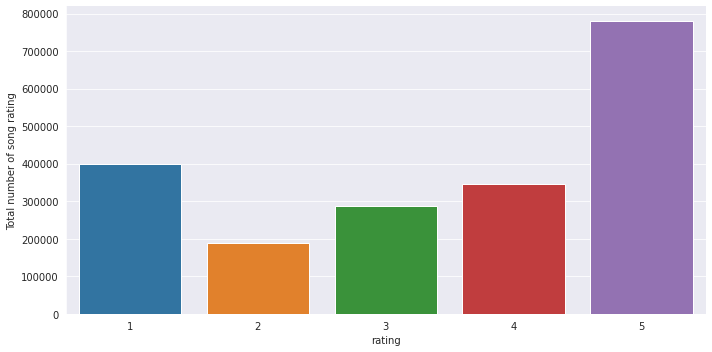

In [86]:
with sns.axes_style('darkgrid'):
    g = sns.catplot("rating", data=df, aspect=2.0, kind='count')
    g.set_ylabels("Total number of song rating")

In [87]:
df.isnull().sum()

userID    0
songID    0
rating    0
dtype: int64

In [88]:
cols = [1,2]
songRating = df[df.columns[cols]]
songRating

,songID,rating
0,7171,5
1,8637,4
2,21966,4
3,35821,5
4,82446,5
...,...,...
1999995,75840,2
1999996,85921,1
1999997,116763,1
1999998,128758,1


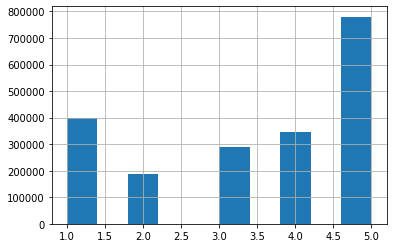

In [89]:
rating.hist(bins=10)

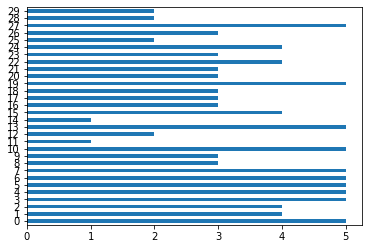

In [90]:
rating.head(30).plot(kind='barh')

In [91]:
df

,userID,songID,rating
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5
...,...,...,...
1999995,199999,75840,2
1999996,199999,85921,1
1999997,199999,116763,1
1999998,199999,128758,1


# Model Development

## Popular

In [92]:
songAvg = songRating.groupby('songID')['rating'].mean().sort_values(ascending=False)
songAvg

songID
12698     5.0
50136     5.0
50193     5.0
104495    5.0
50179     5.0
         ... 
105602    1.0
126396    1.0
16009     1.0
16008     1.0
94976     1.0
Name: rating, Length: 127771, dtype: float64

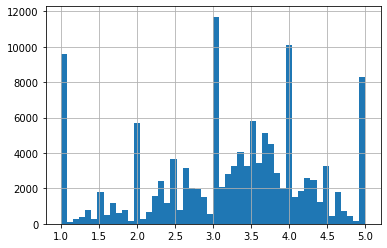

In [93]:
songAvg.hist(bins=50)

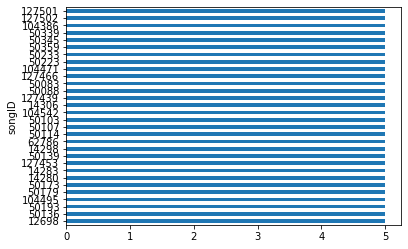

In [94]:
songAvg.head(30).plot(kind='barh')

In [95]:
songPop = songRating.groupby('songID')['rating'].count().sort_values(ascending=False)
songPop

songID
2726      1904
22763     1880
105433    1720
43827     1600
123176    1583
          ... 
18162        1
70113        1
127955       1
70101        1
15797        1
Name: rating, Length: 127771, dtype: int64

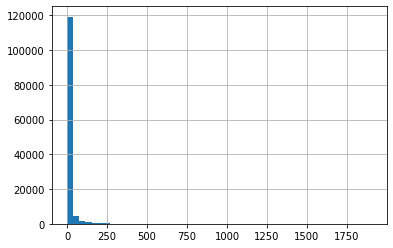

In [96]:
songPop.hist(bins=50)

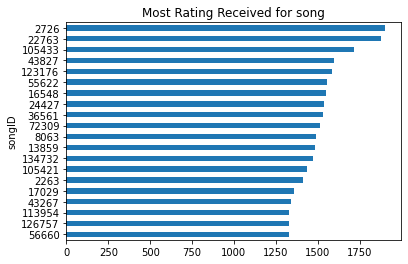

In [97]:
songPop.head(20).sort_values().plot(kind='barh',
                                    title='Most Rating Received for song')

In [98]:
popRecommend = pd.concat([songAvg, songPop],
                         axis=1, join='inner',
                         keys=['Average Rating', 'Rating Received'])

In [99]:
v = popRecommend['Rating Received'] # jumlah rating diterima
R = popRecommend['Average Rating'] # rata-rata rating per produk
C = popRecommend['Average Rating'].mean() # rata-rata rating seluruh produk
m = popRecommend['Rating Received'].quantile(0.75) # minimal jumlah rating yang diterima

popRecommend['Weighted Rating'] = ((R*v)+(C*m))/(v+m)
popRecommend = popRecommend.sort_values('Weighted Rating', ascending=False)
popRecommend.head()

,Average Rating,Rating Received,Weighted Rating
songID,,,
49876,4.782609,46,4.501589
114399,4.750000,48,4.484293
56462,4.581967,122,4.477947
30377,4.621951,82,4.468359
7321,4.525773,194,4.461221


## Content-Based Filtering

In [100]:
userRating = df
userRating

,userID,songID,rating
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5
...,...,...,...
1999995,199999,75840,2
1999996,199999,85921,1
1999997,199999,116763,1
1999998,199999,128758,1


In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
userRating['userID'] = le.fit_transform(userRating['userID'])
userRating['songID'] = le.fit_transform(userRating['songID'])
userRating

,userID,songID,rating
0,0,6706,5
1,0,8076,4
2,0,20574,4
3,0,33515,5
4,0,77032,5
...,...,...,...
1999995,199999,70842,2
1999996,199999,80282,1
1999997,199999,109125,1
1999998,199999,120340,1


In [104]:
!pip install surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(userRating[['userID', 'songID', 'rating']],
                            reader)
svd = SVD(verbose=False, n_epochs=10)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4032  1.4027  1.4040  1.4033  1.4051  1.4036  0.0009  
MAE (testset)     1.2127  1.2113  1.2130  1.2125  1.2134  1.2126  0.0007  
Fit time          54.01   55.70   55.00   55.23   55.27   55.04   0.56    
Test time         5.98    5.67    5.76    5.85    5.89    5.83    0.10    


{'fit_time': (54.01065254211426,
  55.69705271720886,
  54.995821952819824,
  55.23470759391785,
  55.26845169067383),
 'test_mae': array([1.2126743 , 1.21134612, 1.21301191, 1.21252581, 1.21341842]),
 'test_rmse': array([1.40315689, 1.40265279, 1.40404681, 1.4032711 , 1.40511159]),
 'test_time': (5.977407932281494,
  5.673933267593384,
  5.759714603424072,
  5.8482866287231445,
  5.889633417129517)}

In [105]:
def user_recommendation(userID):
    user = userrating[['songID']]
    user = user.reset_index()
    # getting full dataset
    data = Dataset.load_from_df(userrating[['songID']], reader)
    trainset = data.build_full_trainset()
    svd.fit(trainset)
    user['Estimate_Score'] = user['songID'].apply(lambda x: svd.predict(userid, x).est)
    user = user.drop(['index','songID'], axis = 1)
    user = user.sort_values('Estimate_Score' , ascending = False)
    counts1 = user['Estimate_Score'].value_counts()
    user = user[user['Estimate_Score'].isin(counts1[counts1 == 1].index)]
    return user.head(10)

In [108]:
# mencari user yang menyukai buku Harry Potter sebagai contoh
userRating[userRating['songID'].str.contains('20574')]

AttributeError: ignored